In [22]:
%ls data/dogscats_new
%matplotlib inline

sample_submission.csv  test/     train/     valid/
submission_res2.csv    test.zip  train.zip


In [23]:
data_path = "data/dogscats_new/"

In [24]:
import numpy as np
import math
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model

from keras.layers import Dense


# Get data for training and validation
Import and init ImageData generator for future image processing from directory

In [25]:

train_imgs = ImageDataGenerator()
valid_imgs = ImageDataGenerator()
test_imgs = ImageDataGenerator()

In [26]:
# x, y = train_imgs_gen.next()
# square_side = int(math.sqrt(batch_size))
# fig, ax = plt.subplots(square_side,square_side)
# for counter in range(batch_size):
#     ax[counter // square_side, counter % square_side].imshow(x[counter].astype(np.uint8))
# fig.subplots_adjust(hspace=.3)
# fig.set_size_inches(30,30)
# plt.show()

# Load VGG19 keras model

In [27]:
from keras.applications.vgg19 import VGG19
vgg19 = VGG19()

### Remove last layer from vgg19
Since this model is based on imagenet but we want to have only 2 categories instead for 1000 like imagenet have

In [28]:

vgg19.layers.pop()
for layer in vgg19.layers: 
    layer.trainable=False

last = vgg19.layers[-1].output
x = Dense(2, activation="softmax")(last)
model = Model(vgg19.input, x)



In [29]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'] )

In [30]:
img_size = 224 # because vgg19 input is 224,244,3 ; 3 here is for RGB 
batch_size = 64
train_imgs_gen = train_imgs.flow_from_directory(data_path + "train", 
                                                target_size=(img_size,img_size), 
                                                batch_size=batch_size,
                                                color_mode = "rgb")

valid_imgs_gen = valid_imgs.flow_from_directory(data_path + "valid", 
                                                target_size=(img_size,img_size), 
                                                batch_size=batch_size,
                                                color_mode = "rgb")

test_imgs_gen = test_imgs.flow_from_directory(data_path + "test",
                                                    target_size=(img_size,img_size), 
                                                    batch_size=batch_size,
                                                    color_mode = "rgb")

Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [31]:
print((train_imgs_gen.nb_sample - batch_size // batch_size))
print((valid_imgs_gen.nb_sample - batch_size // batch_size))
model.fit_generator(  train_imgs_gen, 
                      samples_per_epoch= train_imgs_gen.nb_sample// (batch_size/4),
                      nb_epoch = 4,
                      validation_data = valid_imgs_gen,
                      nb_val_samples = valid_imgs_gen.nb_sample// (batch_size/4)
                     )


22777
2221
Epoch 1/4
1408/1423 [============================>.] - ETA: 0s - loss: 0.2140 - acc: 0.9240 

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


1472/1423 [===============================] - 42s - loss: 0.2163 - acc: 0.9232 - val_loss: 0.1602 - val_acc: 0.9479
Epoch 2/4
1472/1423 [===============================] - 42s - loss: 0.1393 - acc: 0.9565 - val_loss: 0.0825 - val_acc: 0.9583

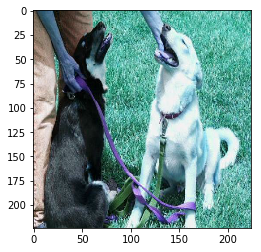

In [35]:
from PIL import Image

img = cv2.imread('./data/dogscats_new/test/unknown/33.jpg')
img=cv2.resize(img,(224,224))
img=np.array(img).reshape((224,224,3))
plt.imshow(img)
img = img.reshape((1,) + img.shape)
np.rint(model.predict(img))
model.save_weights('my_custom_v19_model.weight')

In [45]:
model_gen = model.predict_generator(test_imgs_gen, test_imgs_gen.nb_sample)

In [46]:
submission_file_name = 'submission_res.csv'
filenames = test_imgs_gen.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])
isdog = model_gen[:,1]
isdog = isdog.clip(min=0.05, max=0.95)
subm = np.stack([ids,isdog], axis=1)
subm[:5]
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

In [47]:
from IPython.display import FileLink
FileLink(submission_file_name)

/home/aind2/fast_AI/courses/deeplearning1/nbs/submission_res4.csv